## **SETUP**

In [1]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import numpy.ma as ma
import os
scaler_input = StandardScaler()
scaler_output = StandardScaler()

# **LOADING DATA**

In [2]:

SteadyState_Input = []

base_path = r'C:\\Users\\ismai\\OneDrive\\Desktop\\CFD Dissertation\\Files\\CSV training\\SteadyCSV'

transient_base_path = r'C:\\Users\\ismai\\OneDrive\\Desktop\\CFD Dissertation\\Files\\CSV training\\ML_OuputMaxV_CSV'

SteadyState_Input = []
Transient_Output = []
totalNodes = 0

for i in range(1, 41):  # Loop from N1 to N40
    # Construct the steady state file path
    steady_folder_name = f"N{i}Steady"
    steady_file_name = f"N{i}SPVS.csv"
    steady_file_path = os.path.join(base_path, steady_folder_name, steady_file_name)
    
    # Construct the transient file path (assuming a similar naming convention)
    transient_folder_name = f"N{i}"
    transient_file_name = f"N{i}TPV.csv"
    transient_file_path = os.path.join(transient_base_path, transient_folder_name, transient_file_name)

      
    NP = pd.read_csv(steady_file_path)
    NP = NP.replace(' null', 0)
    NPSteady_velocity = NP.iloc[:, 4].values.reshape(-1, 1)
    NPSteady_velocity = scaler_input.fit_transform(NPSteady_velocity)
    SteadyState_Input.append(NPSteady_velocity)

    # Process the transient CSV
    NT = pd.read_csv(transient_file_path)
    NT = NT.replace(' null', 0)
    NPTransient_velocity = NT.iloc[:, 4].values.reshape(-1, 1)
    NPTransient_velocity = scaler_output.fit_transform(NPTransient_velocity)
    Transient_Output.append(NPTransient_velocity)

    # Update the total nodes count and print
    totalNodes += NPSteady_velocity.shape[0]
    print(NPSteady_velocity.shape[0], totalNodes)


2725 2725
3709 6434
6717 13151
4748 17899
6412 24311
3962 28273
4672 32945
6141 39086
2224 41310
2851 44161
3314 47475
2900 50375
3148 53523
3636 57159
4175 61334
3717 65051
6095 71146
5915 77061
5135 82196
4124 86320
5362 91682
2443 94125
4526 98651
6169 104820
2513 107333
5504 112837
5745 118582
3405 121987
5301 127288
5319 132607
6713 139320
2271 141591
2602 144193
6112 150305
4513 154818
6150 160968
2061 163029
3424 166453
7286 173739
4042 177781


# **LSTM**

In [3]:
#https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html
#https://numpy.org/doc/stable/reference/generated/numpy.reshape.html
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
SteadyState_Input_LSTM = np.concatenate(SteadyState_Input)
Transient_Output_LSTM = np.concatenate(Transient_Output)
SteadyState_Input_LSTM_Reshape = SteadyState_Input_LSTM.reshape((SteadyState_Input_LSTM.shape[0], 1, SteadyState_Input_LSTM.shape[1]))
Steady_train, Steady_test, Transient_train, Transient_test = train_test_split(SteadyState_Input_LSTM_Reshape, Transient_Output_LSTM, test_size=0.2, random_state=42)

In [4]:
#https://keras.io/api/layers/core_layers/dense/
#https://keras.io/api/layers/recurrent_layers/lstm/#lstm-layer
#https://keras.io/guides/sequential_model/
#https://keras.io/api/optimizers/
#https://keras.io/api/losses/
#https://github.com/DPCscience/deep-learning-for-GS/blob/master/datacamp_deeplearning.py
#https://keras-contrib.readthedocs.io/en/latest/sources/getting-started/sequential-model-guide/
model = Sequential()
model.add(LSTM(32, input_shape=(Steady_train.shape[1], Steady_train.shape[2])))  # Input layer.
model.add(Dense(64, activation='relu'))  # Hidden layer
model.add(Dense(Transient_train.shape[1], activation='linear'))  # Output layer# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [5]:
#https://keras.io/api/layers/core_layers/dense/
#https://keras.io/api/layers/recurrent_layers/lstm/#lstm-layer
#https://keras.io/guides/sequential_model/
#https://keras.io/api/optimizers/
#https://keras.io/api/losses/
#https://github.com/DPCscience/deep-learning-for-GS/blob/master/datacamp_deeplearning.py
#https://keras-contrib.readthedocs.io/en/latest/sources/getting-started/sequential-model-guide/
#https://keras.io/api/models/model_training_apis/#evaluate-method
#https://keras.io/api/models/model_training_apis/#fit-method
model.fit(Steady_train, Transient_train, epochs=10, batch_size=16, validation_split=0.4)
loss, mse = model.evaluate(Steady_test, Transient_test)
print(f"Model performance:\nLoss: {loss}\nMSE: {mse}")

Epoch 1/10
3658/5334 [===================>..........] - ETA: 2s - loss: 0.0824 - mean_squared_error: 0.0824

# **PREDICTION**

In [68]:
# https://keras.io/api/models/model_training_apis/
SteadyState_New1 = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\N0SPVS.csv')
SteadyState_New1 = SteadyState_New1.replace(' null', 0)
SteadyStateVelocity_1 = SteadyState_New1.iloc[:, 4].values.reshape(-1, 1)
SteadyStateVelocity_1  = scaler_input.transform(SteadyStateVelocity_1 )
SteadyStateVelocity_1 = SteadyStateVelocity_1.reshape((SteadyStateVelocity_1.shape[0], 1, SteadyStateVelocity_1.shape[1]))
Prediction1  = model.predict(SteadyStateVelocity_1)
Prediction1 = scaler_output.inverse_transform(Prediction1)
SteadyState_New1 ['Transient Prediction 0'] = Prediction1
print(Prediction1)
SteadyState_New1.to_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N0.csv', index=False)

138/138 [==============================] - 0s 849us/step
[[0.48176894]
 [0.48625585]
 [0.48027602]
 ...
 [0.3033338 ]
 [0.25741497]
 [0.21173704]]


# **RESULTS**

In [69]:
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import numpy as np
import numpy.ma as ma
import pandas as pd

In [71]:
PredictedTransient = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\PredictionFile\N0.csv')
# Print column names
print(PredictedTransient.columns)
PredictedTransient = PredictedTransient.fillna(0)
PredictedTransient = PredictedTransient.replace(' null', np.nan)
x = PredictedTransient[' X [ m ]']
z = PredictedTransient[' Z [ m ]']
ste_velocity = PredictedTransient[' Velocity [ m s^-1 ]']
velocity = PredictedTransient['Transient Prediction 0']
diff_ste = PredictedTransient['Transient Prediction 0'] - PredictedTransient[' Velocity [ m s^-1 ]']

Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Velocity [ m s^-1 ]', ' Wall Shear [ Pa ]', 'Transient Prediction 0'],
      dtype='object')


In [74]:
CFDTransient = pd.read_csv(r'C:\Users\ismai\OneDrive\Desktop\CFD Dissertation\Files\CSV training\ML_OuputMaxV_CSV\N0\N0TPV.csv')
print(CFDTransient.columns)
CFDTransient = CFDTransient.fillna(0)
CFDTransient = CFDTransient.replace(' null', np.nan)
x = CFDTransient [' X [ m ]']
z = CFDTransient [' Z [ m ]']
velocity_truth = CFDTransient [' Velocity [ m s^-1 ]']
diff_vel = PredictedTransient['Transient Prediction 0'] - CFDTransient[' Velocity [ m s^-1 ]']

Index(['Node Number', ' X [ m ]', ' Y [ m ]', ' Z [ m ]',
       ' Velocity [ m s^-1 ]'],
      dtype='object')


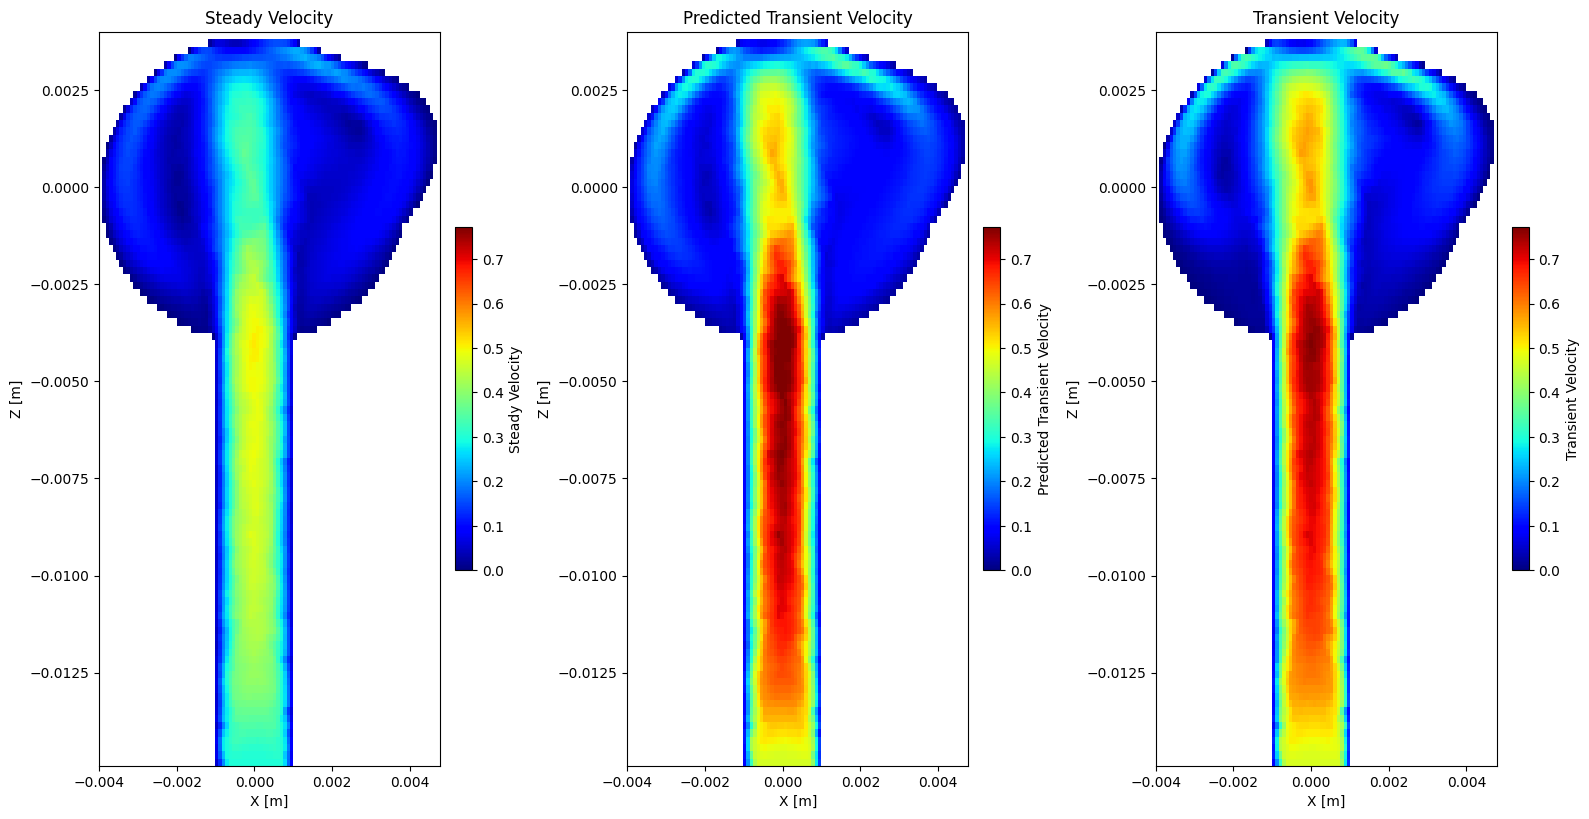

In [75]:
# Generate your grid
grid_x, grid_z = np.mgrid[min(x):max(x):100j, min(z):max(z):100j]

# Interpolate the velocity onto the grid
grid_velocity0 = griddata((x, z), ste_velocity, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity1 = griddata((x, z), velocity, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity2 = griddata((x, z), velocity_truth, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity3 = griddata((x, z), diff_vel, (grid_x, grid_z), method='linear', fill_value=np.nan)
grid_velocity4 = griddata((x, z), diff_ste, (grid_x, grid_z), method='linear', fill_value=np.nan)

# Create a colormap
cmap = plt.cm.jet  # or any other colormap
cmap.set_bad(color='white')  # set color for 'nan' values

# Create a masked array where 'nan' values, 0 velocity values, and velocity values 0.05 or less are masked
masked_velocity0 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity0), grid_velocity0)
masked_velocity1 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity1), grid_velocity1)
masked_velocity2 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity2), grid_velocity2)
masked_velocity3 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity3), grid_velocity3)
masked_velocity4 = ma.masked_where((grid_velocity0 <= 0.001) | np.isnan(grid_velocity4), grid_velocity4)

# Generate heat maps for velocity
#plt.subplot(1, 1, 1)
fig, (ax0,ax1,ax2) = plt.subplots(1,3,figsize=(16, 26))
fig.patch.set_facecolor('white')

im0 = ax0.imshow(masked_velocity0.T, extent=(min(x), max(x), min(z), max(z)), origin='lower', cmap=cmap, vmin=0, vmax=masked_velocity2.max())
fig.colorbar(im0, ax=ax0, label='Steady Velocity',fraction=0.046, pad=0.04)
ax0.set_title('Steady Velocity')
ax0.set_xlabel("X [m]")
ax0.set_ylabel("Z [m]")
im1 = ax1.imshow(masked_velocity1.T, extent=(min(x), max(x), min(z), max(z)), origin='lower', cmap=cmap, vmin=0, vmax=masked_velocity2.max())
fig.colorbar(im1, ax=ax1, label='Predicted Transient Velocity',fraction=0.046, pad=0.04)
ax1.set_title('Predicted Transient Velocity')
ax1.set_xlabel("X [m]")
ax1.set_ylabel("Z [m]")
im2 = ax2.imshow(masked_velocity2.T, extent=(min(x), max(x), min(z), max(z)), origin='lower', cmap=cmap, vmin=0, vmax=masked_velocity2.max())
fig.colorbar(im2, ax=ax2, label='Transient Velocity',fraction=0.046, pad=0.04)
ax2.set_title('Transient Velocity')
ax2.set_xlabel("X [m]")
ax2.set_ylabel("Z [m]")

# Save the figure to a file with 600x600 pixels

plt.savefig('predicted_velocity_heatmap_N11Transient.png', dpi=100, bbox_inches='tight', pad_inches = 0)
plt.tight_layout()
plt.show()

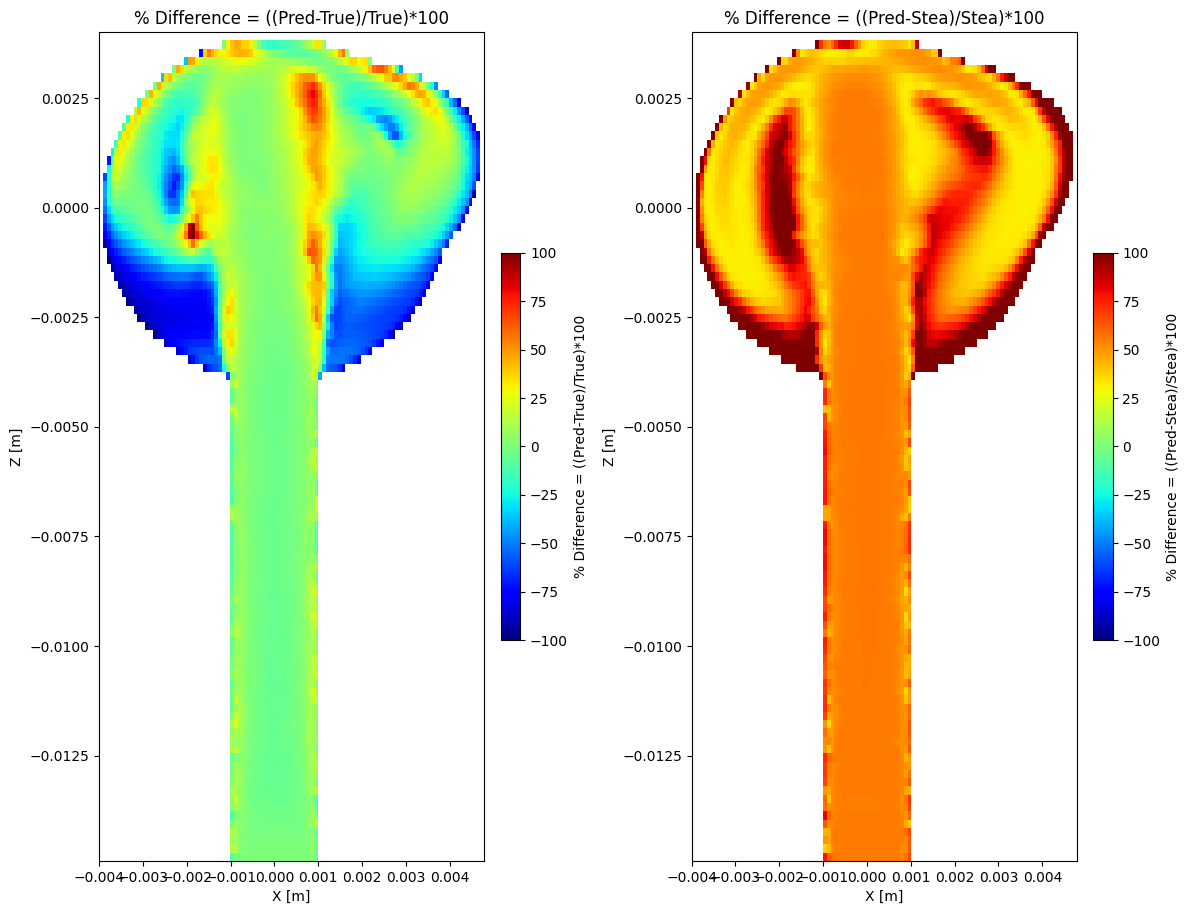

In [76]:
# Calculate percentage differences
percentage_change3 = ((masked_velocity2 - masked_velocity1) / masked_velocity1) * 100
percentage_change4 = ((masked_velocity1 - masked_velocity0) / masked_velocity0) * 100

fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(12, 12))
fig.patch.set_facecolor('white')

# Heatmap for percentage difference between predicted transient and transient truth
im3 = ax3.imshow(percentage_change3.T, extent=(min(x), max(x), min(z), max(z)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im3, ax=ax3, label='% Difference = ((Pred-True)/True)*100', fraction=0.046, pad=0.04)
ax3.set_title('% Difference = ((Pred-True)/True)*100')
ax3.set_xlabel("X [m]")
ax3.set_ylabel("Z [m]")

# Heatmap for percentage difference between predicted transient and steady velocity
im4 = ax4.imshow(percentage_change4.T, extent=(min(x), max(x), min(z), max(z)), origin='lower', cmap='jet', vmin=-100, vmax=100)
fig.colorbar(im4, ax=ax4, label='% Difference = ((Pred-Stea)/Stea)*100', fraction=0.046, pad=0.04)
ax4.set_title('% Difference = ((Pred-Stea)/Stea)*100')
ax4.set_xlabel("X [m]")
ax4.set_ylabel("Z [m]")

plt.tight_layout()
plt.show()


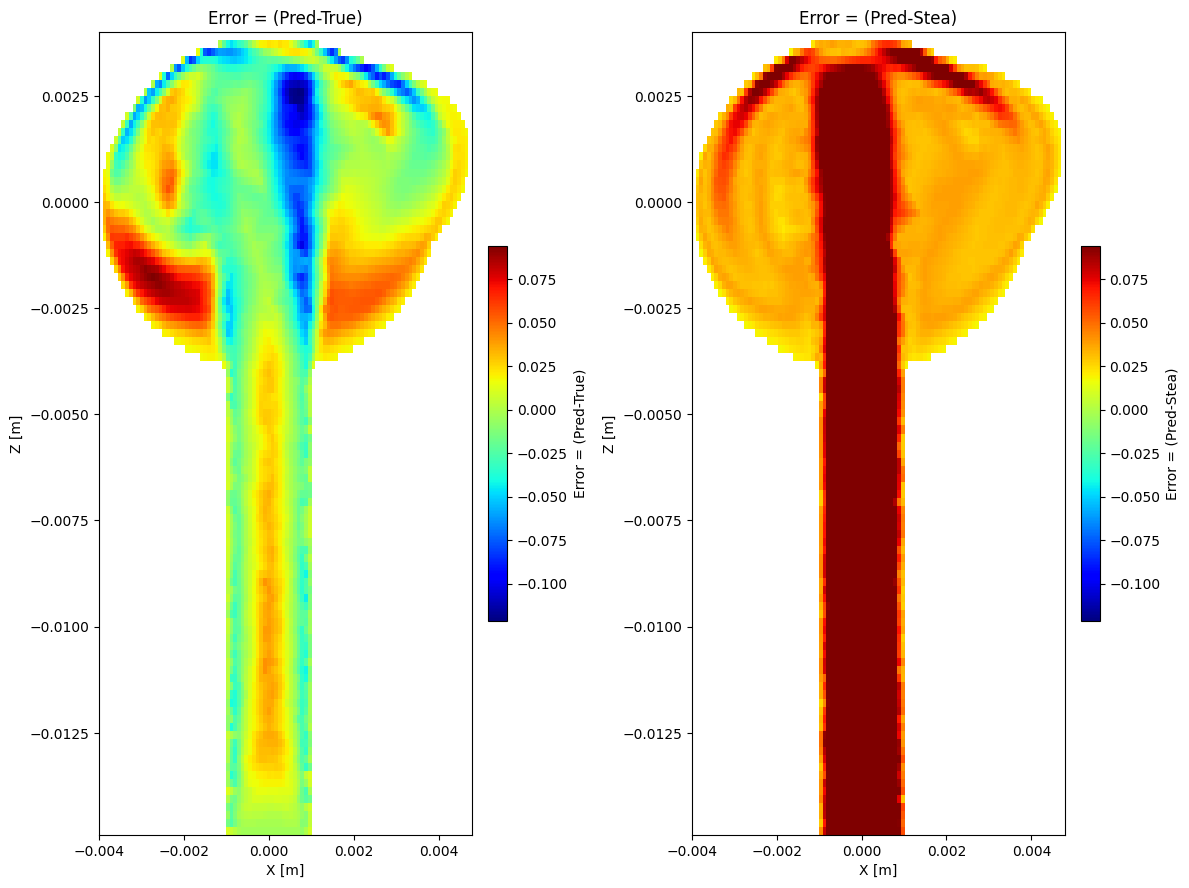

In [79]:
# Generate heat maps for velocity
#plt.subplot(1, 1, 1)
fig, (ax3,ax4) = plt.subplots(1,2,figsize=(12, 12))
fig.patch.set_facecolor('white')

im3 = ax3.imshow(masked_velocity3.T, extent=(min(x), max(x), min(z), max(z)), origin='lower', cmap=cmap, vmin=masked_velocity3.min(), vmax=masked_velocity3.max())
fig.colorbar(im3, ax=ax3, label='Error = (Pred-True)',fraction=0.046, pad=0.04)
ax3.set_title('Error = (Pred-True)')
ax3.set_xlabel("X [m]")
ax3.set_ylabel("Z [m]")
im4 = ax4.imshow(masked_velocity4.T, extent=(min(x), max(x), min(z), max(z)), origin='lower', cmap=cmap, vmin=masked_velocity3.min(), vmax=masked_velocity3.max())
fig.colorbar(im4, ax=ax4, label='Error = (Pred-Stea)',fraction=0.046, pad=0.04)
ax4.set_title('Error = (Pred-Stea)')
ax4.set_xlabel("X [m]")
ax4.set_ylabel("Z [m]")

plt.tight_layout()
plt.show()